# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

In [6]:
cities

['floro',
 'longyearbyen',
 'bilibino',
 'waitangi',
 'albany',
 'bethel',
 'adamstown',
 'copiapo',
 'afaahiti',
 'aswan',
 'jamestown',
 'puerto natales',
 'edinburgh of the seven seas',
 'adrar',
 'howard springs',
 'geraldton',
 'pacific grove',
 'papao',
 'tazacorte',
 'port mathurin',
 'fuvahmulah',
 'enewetak',
 'luderitz',
 'georgiyevka',
 'haiku-pauwela',
 'angaur state',
 'blackmans bay',
 'olonkinbyen',
 'conceicao da barra',
 'mount isa',
 'new norfolk',
 'howrah',
 'isafjordur',
 'bredasdorp',
 'coahuayana de hidalgo',
 'udachny',
 'paulden',
 'susuman',
 'gorgan',
 'weno',
 'port-aux-francais',
 'vilyuchinsk',
 'nemuro',
 'muisne',
 'hihifo',
 'magadan',
 'west island',
 'nanao',
 'itaituba',
 'ostersund',
 'twon-brass',
 'papatowai',
 'valparaiso',
 'anadyr',
 'keningau',
 'usogorsk',
 'iqaluit',
 'thompson',
 'iskateley',
 'grytviken',
 'tiksi',
 'vila velha',
 'stanley',
 'fukuecho',
 'porto belo',
 'kone',
 'port hedland',
 'fort st. john',
 'cargados carajos',
 'gall

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | floro
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | copiapo
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | aswan
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | adrar
Processing Record 15 of Set 1 | howard springs
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | papao
Processing Record 19 of Set 1 | tazacorte
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 22 of Se

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,floro,61.5996,5.0328,278.19,87,75,13.89,NO,1705824582
1,longyearbyen,78.2186,15.6401,257.06,72,75,3.60,SJ,1705824583
2,bilibino,68.0546,166.4372,251.89,95,100,1.37,RU,1705824583
3,waitangi,-43.9535,-176.5597,292.49,94,100,1.79,NZ,1705824584
4,albany,42.6001,-73.9662,262.97,74,33,2.24,US,1705824584


In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,floro,61.5996,5.0328,278.19,87,75,13.89,NO,1705824582
1,longyearbyen,78.2186,15.6401,257.06,72,75,3.60,SJ,1705824583
2,bilibino,68.0546,166.4372,251.89,95,100,1.37,RU,1705824583
3,waitangi,-43.9535,-176.5597,292.49,94,100,1.79,NZ,1705824584
4,albany,42.6001,-73.9662,262.97,74,33,2.24,US,1705824584


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/csv.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/csv.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,floro,61.5996,5.0328,278.19,87,75,13.89,NO,1705824582
1,longyearbyen,78.2186,15.6401,257.06,72,75,3.60,SJ,1705824583
2,bilibino,68.0546,166.4372,251.89,95,100,1.37,RU,1705824583
3,waitangi,-43.9535,-176.5597,292.49,94,100,1.79,NZ,1705824584
4,albany,42.6001,-73.9662,262.97,74,33,2.24,US,1705824584


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

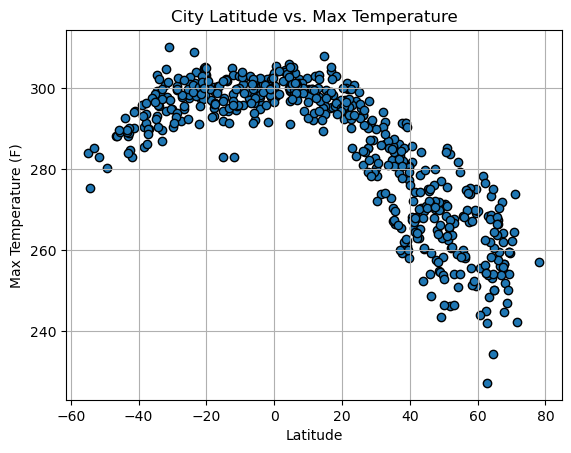

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

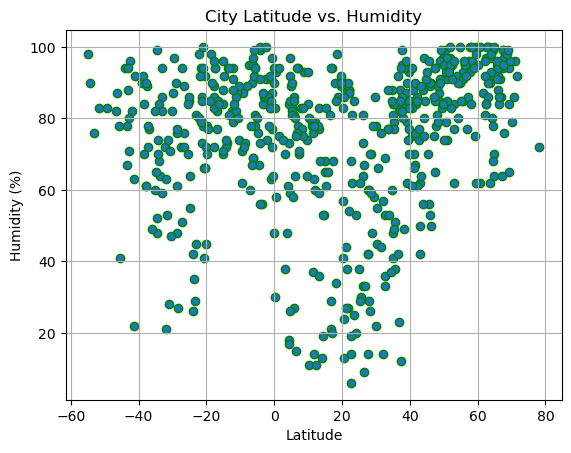

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolors="Green")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

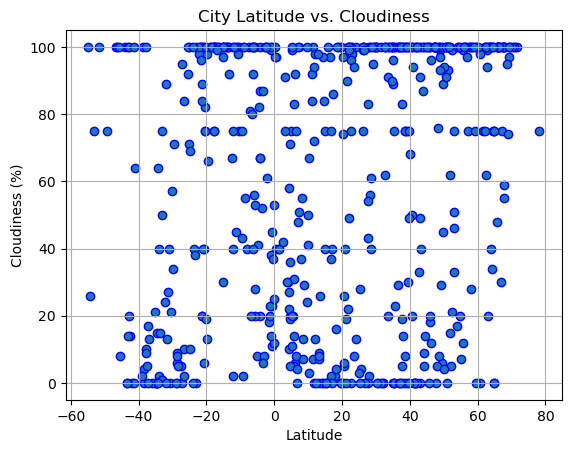

In [18]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/Fig3.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

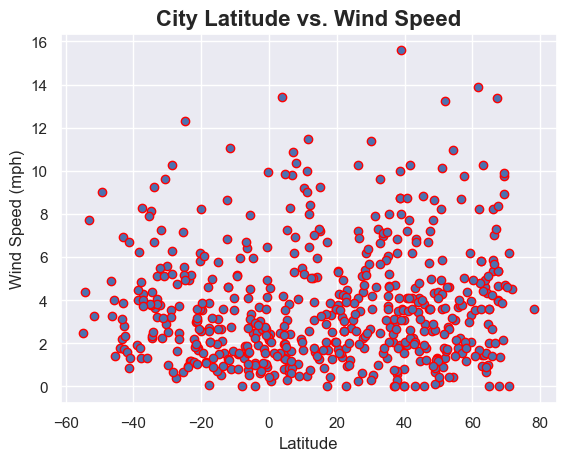

In [19]:
import seaborn as sns

# Set the style of the plot
sns.set(style="darkgrid")

# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", edgecolors="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=16, fontweight='bold')
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/Fig4.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

In [24]:
# Filter the DataFrame for Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,floro,61.5996,5.0328,278.19,87,75,13.89,NO,1705824582
1,longyearbyen,78.2186,15.6401,257.06,72,75,3.60,SJ,1705824583
2,bilibino,68.0546,166.4372,251.89,95,100,1.37,RU,1705824583
4,albany,42.6001,-73.9662,262.97,74,33,2.24,US,1705824584
5,bethel,41.3712,-73.4140,265.38,70,0,2.06,US,1705824526


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,292.49,94,100,1.79,NZ,1705824584
6,adamstown,-25.0660,-130.1015,297.58,85,71,5.55,PN,1705824585
7,copiapo,-27.3667,-70.3333,291.94,72,5,0.38,CL,1705824585
8,afaahiti,-17.7500,-149.2833,295.08,86,100,3.89,PF,1705824586
11,puerto natales,-51.7236,-72.4875,282.83,83,100,3.25,CL,1705824587


###  Temperature vs. Latitude Linear Regression Plot

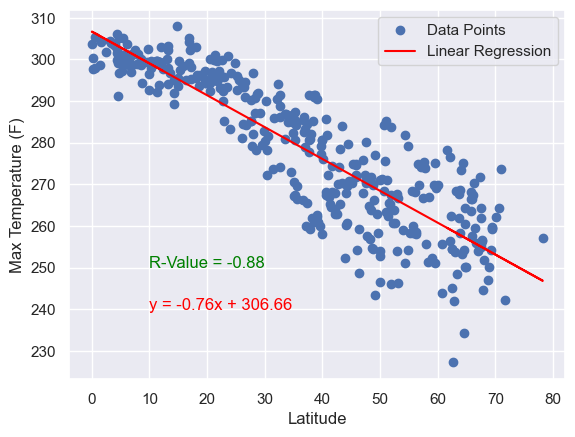

In [30]:
# Linear regression on Northern Hemisphere
# Generate a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Add legend
plt.legend()
plt.text(10, 240, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(10, 250, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

R-value: 0.5433423766819314


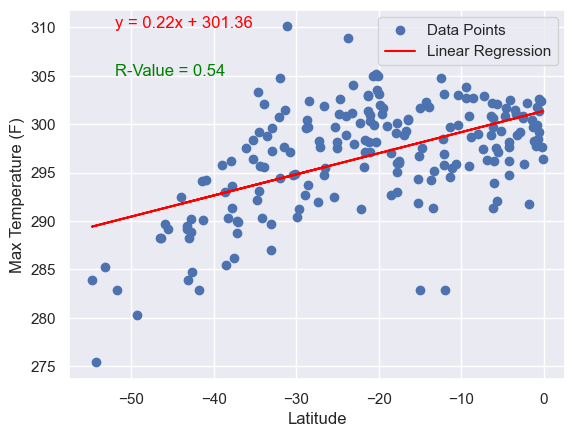

In [31]:
# Linear regression on Southern Hemisphere
# Generate a scatter plot
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Add legend
plt.legend()
plt.text(-52, 310, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(-52, 305, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

In [ ]:
#Discussion about the linear relationship
###the first graphs shows that tempreture and latitude has a strong negative coorelations as the latitude increases the tempreture decreases.
#also, the see that the tempreture is higher in the southern hemisphere than the northern hemisphere.
#also, the second graph shows that tempreture and latitude has a  positive coorelations as the latitude decreases the tempreture increases.

### Humidity vs. Latitude Linear Regression Plot

R-value: 0.4309163436303047


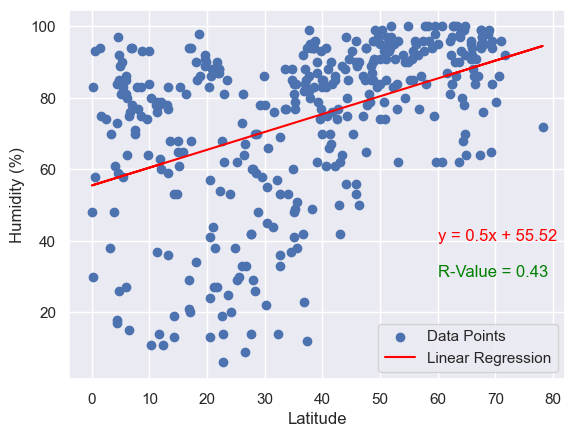

In [32]:
# Northern Hemisphere

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Add legend
plt.legend()
plt.text(60, 40, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(60, 30, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

R-value: 0.20208337904820972


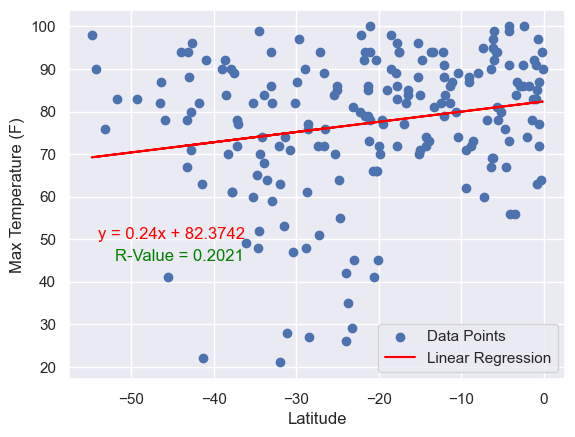

In [33]:
# Southern Hemisphere
# Generate a scatter plot
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Add legend
plt.legend()
plt.text(-54, 50, f"y = {round(slope, 2)}x + {round(intercept, 4)}", color='red')
plt.text(-52, 45, f"R-Value = {round(r_value, 4)}", color='green')
# Display the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#as the latitude the humidity increase slightly as well. However,the second graph shows that there is no strong coorelation between humidity and latitude. so we can not 
#xconclude that humidity and latitude are coorelated. 

### Cloudiness vs. Latitude Linear Regression Plot

R-value: 0.3085987076325644


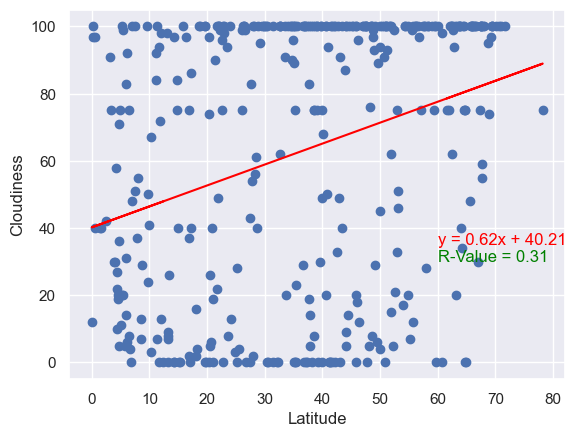

In [35]:
# Northern Hemisphere

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(60, 35, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(60, 30, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

R-value: 0.25255113278702906


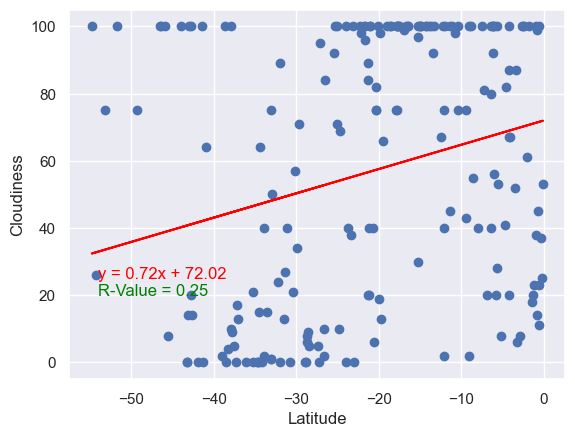

In [36]:
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(-54, 25, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(-54, 20, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#the coorelation between cloudiness and latitude is very weak. However, the first graph shows that as the latitude increases the cloudiness SLIGHTLY increases as well BUT
#WE CAN not say conclusively that cloudiness and latitude are coorelated.

### Wind Speed vs. Latitude Linear Regression Plot

R-value: 0.07062732779241446


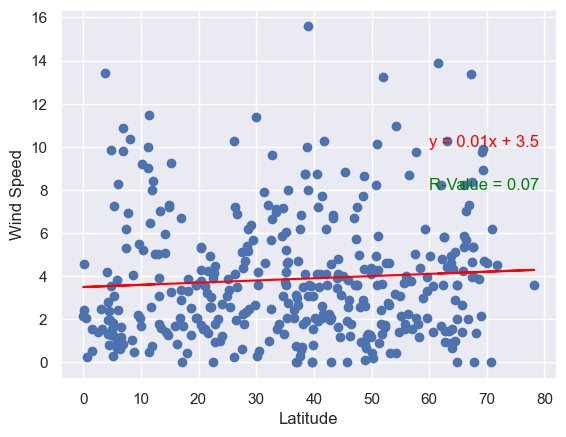

In [37]:
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(60, 10, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(60, 8, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

R-value: -0.2005106835022403


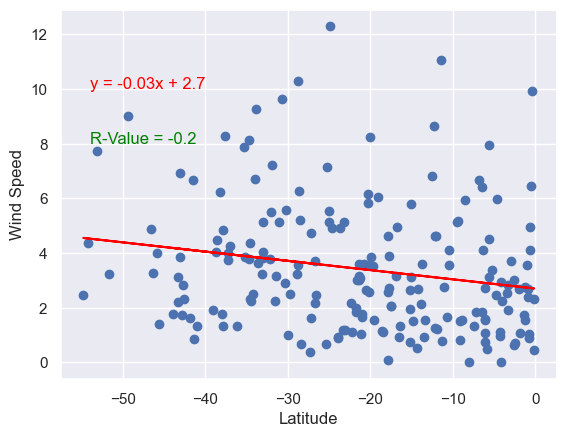

In [38]:
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(-54, 10, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(-54, 8, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#the coorelation is almost zero in the northern hamispher and -0.2 in the southern hemisphere. so we can not not say that wind speed and latitude are coorelated.
#Or in the other words, latitude does not have any effect on wind speed.